In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
# Load tha data for the pose
poseName = 'Arabesque'
loaded = np.load('RootCoordinates/'+poseName+'X.npy')
print("Loaded: ",loaded)
print("Length:", len(loaded))

Loaded:  [[0.579664 0.320268 0.892814 ... 0.497998 0.786081 0.773293]
 [0.581808 0.317562 0.895144 ... 0.502131 0.783505 0.774422]
 [0.577609 0.314789 0.909073 ... 0.497993 0.786139 0.77058 ]
 ...
 [0.559326 0.303823 0.90309  ... 0.477566 0.750626 0.749621]
 [0.55714  0.306521 0.948539 ... 0.481576 0.753467 0.676141]
 [0.563351 0.322821 0.977854 ... 0.318232 0.461866 0.587947]]
Length: 870


870


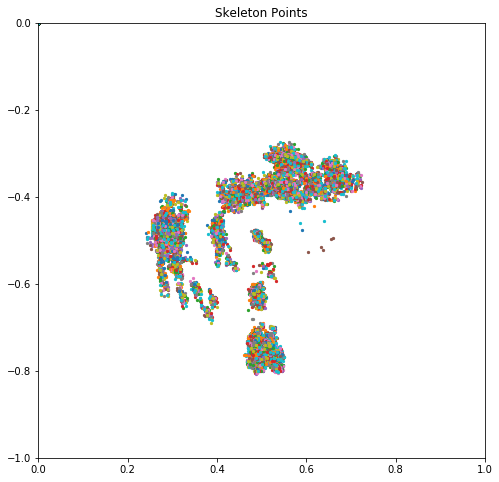

In [5]:
count=0
def plotCoordinates():
    fig, ax = plt.subplots(1, figsize=(8,8))
    plt.title('Skeleton Points')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global count
    for list in loaded:
        x = list[0::3]
        posY = list[1::3]
        y = [-y for y in posY] #need to make the loaded y values negative for plotting correctly.
        c = list[2::3]
        sc = ax.scatter(x,y,s=5)
        count+=1
plotCoordinates()
print(count)
        

870


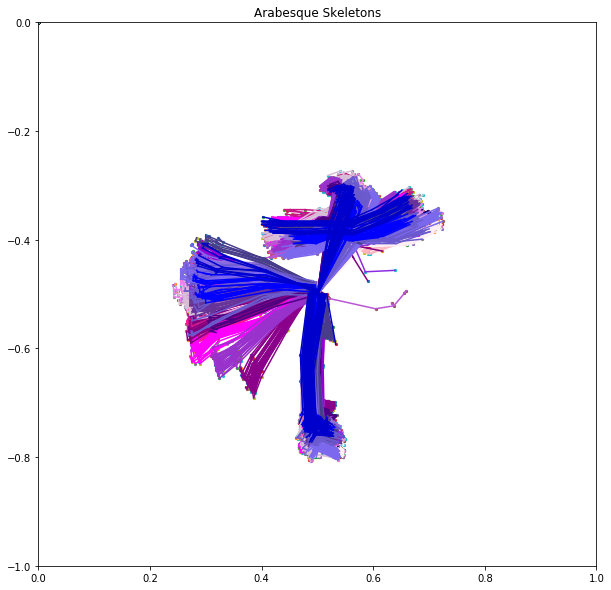

In [26]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
penColor = ['lightpink','pink','crimson','palevioletred','lavenderblush','hotpink','deeppink','mediumvioletred','orchid','magenta','fuchsia','darkmagenta','purple','violet','plum','thistle','mediumorchid','darkviolet','darkorchid','indigo','blueviolet','rebeccapurple','mediumpurple','mediumslateblue','darkslateblue','slateblue','blue','mediumblue','darkblue','navy']

allXList =[]
allYList = []
allCList=[]

dancerNum = 0
count = 0
def plotSkeletons():
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.title('Arabesque Skeletons')
    plt.xlim(0,1)
    plt.ylim(-1,0)
    global dancerNum
    global count
    for list in loaded:
        x = list[0::3]
        allXList.append(x)# all x values per sample
        posY = list[1::3]
        y = [-y for y in posY]# all y values per sample
        allYList.append(y) # the negative values get saved as the mean skeleton.
        c = list[2::3]
        allCList.append(c)# all c values per sample
        sc = ax.scatter(x,y,s=5)
        for bone in bones:
            if((x[bone[0]]==0 and y[bone[0]]==0) or(x[bone[1]]==0 and y[bone[1]]==0)):
                continue
                
            ax.plot([x[bone[0]],x[bone[1]]],[y[bone[0]],y[bone[1]]],penColor[dancerNum-1])
        count+=1
        if count%30 == 0:
            dancerNum+=1
            #print(dancerNum)
plotSkeletons()
print(count)

In [25]:
#Save the split up lists in XYCSplitListsDirectory
np.save('XYCSplitLists/allArabesqueXList.npy', allXList)
np.save('XYCSplitLists/allArabesqueYList.npy', allYList)
np.save('XYCSplitLists/allArabesqueCList.npy', allCList)

xloaded = np.load('XYCSplitLists/allArabesqueXList.npy')
print(xloaded)
yloaded = np.load('XYCSplitLists/allArabesqueYList.npy')
print(yloaded)
cloaded = np.load('XYCSplitLists/allArabesqueCList.npy')
print(xloaded)

[[0.579664 0.557149 0.540808 ... 0.53069  0.526492 0.497998]
 [0.581808 0.563235 0.546904 ... 0.532751 0.528581 0.502131]
 [0.577609 0.55921  0.542834 ... 0.530691 0.524544 0.497993]
 ...
 [0.559326 0.534806 0.512293 ... 0.510302 0.502073 0.477566]
 [0.55714  0.536739 0.508141 ... 0.516288 0.506091 0.481576]
 [0.563351 0.54496  0.516399 ... 0.283473 0.285536 0.318232]]
[[-0.320268 -0.385559 -0.374829 ... -0.780723 -0.786074 -0.786081]
 [-0.317562 -0.385665 -0.380181 ... -0.780599 -0.78342  -0.783505]
 [-0.314789 -0.388354 -0.380189 ... -0.783312 -0.786146 -0.786139]
 ...
 [-0.303823 -0.36656  -0.366523 ... -0.739747 -0.745255 -0.750626]
 [-0.306521 -0.369302 -0.369176 ... -0.742638 -0.750744 -0.753467]
 [-0.322821 -0.385586 -0.385458 ... -0.442762 -0.437266 -0.461866]]
[[0.579664 0.557149 0.540808 ... 0.53069  0.526492 0.497998]
 [0.581808 0.563235 0.546904 ... 0.532751 0.528581 0.502131]
 [0.577609 0.55921  0.542834 ... 0.530691 0.524544 0.497993]
 ...
 [0.559326 0.534806 0.512293 ...

In [27]:
# Now calculate mean skeleton:
sumXList = [sum(i) for i in zip(*allXList)]# the * indicates the use of iterables
sumYList = [sum(j) for j in zip(*allYList)]
sumCList =[sum(k) for k in zip(*allCList)]
print(sumXList)
print(sumYList)
print(sumCList)

#Get the average: sum/count - count calculated in cell 2 of this notebook = number of samples.
avgXList = [sx / count for sx in sumXList]
avgYList = [sy / count for sy in sumYList]
avgCList =[sc / count for sc in sumCList]
print(avgXList)
print(avgYList)
print(avgCList)

[497.47995500000036, 477.9826279999999, 461.6092950000005, 424.7285269999996, 387.9369199999998, 495.39891300000005, 539.5478560000009, 582.845678, 433.5, 419.5312709999998, 364.7900829999997, 309.5727270000005, 441.1541429999998, 422.063421, 418.0828500000003, 491.16812, 4.014731, 475.66067600000014, 0.0, 439.79026100000027, 426.5679599999991, 405.52735600000057, 296.9691360000004, 293.6538980000001, 303.3371140000001]
[-277.7776030000001, -333.54149900000004, -329.1480099999999, -339.35214099999985, -343.2356820000003, -337.5305750000004, -327.6732409999998, -306.2540310000003, -433.5, -418.3447190000005, -450.2229339999998, -484.90651799999995, -441.7431180000002, -536.3857999999999, -630.827108, -272.21133999999967, -2.15617, -280.9003129999999, 0.0, -636.6184309999998, -620.3779260000003, -634.8536599999992, -489.12531799999994, -483.86478299999965, -487.28321800000003]
[796.418332000001, 780.7380469999996, 745.3342159999999, 748.0108500000008, 763.3511000000007, 728.5998689999999

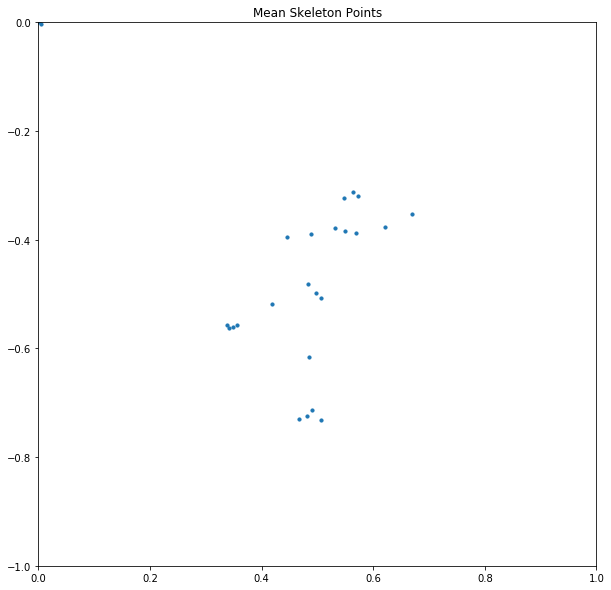

In [37]:
bones = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,8],[8,12],[8,9],[9,10],[10,11],[11,24],[11,22],[22,23],[12,13],[13,14],[14,21],[14,19],[19,20],[0,16],[0,15],[15,17],[16,18]]
#Plot mean skeleton:
def plotMeanCoordinates():
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Mean Skeleton Points')
    plt.xlim(0, 1)
    plt.ylim(-1, 0)
    sc = ax.scatter(avgXList,avgYList, s=10)
    #for bone in bones:
        #if avgXList[bone[0]]== 0.0 or avgYList[bone[0]] == 0.0  or avgXList[bone[1]] == 0.0 or avgYList[bone[1]] == 0.0:
            #print("zero values for joint: ",avgXList.index(avgXList[bone[0]]))
            #print("zero values for joint: ",avgXList.index(avgXList[bone[1]]))
        #ax.plot([avgXList[bone[0]],avgXList[bone[1]]],[avgYList[bone[0]],avgYList[bone[1]]])
plotMeanCoordinates()




In [38]:
#calculation of standard deviation values:
import statistics

In [40]:
standardDeviationX = [statistics.stdev(i) for i in zip(*allXList)]
standardDeviationY = [statistics.stdev(i) for i in zip(*allYList)]
standardDeviationC = [statistics.stdev(i) for i in zip(*allCList)]

print("Standard Deviations of X values:",standardDeviationX)
print("Standard Deviations of Y values:",standardDeviationY)
print("Standard Deviations of C values:",standardDeviationC)

Standard Deviations of X values: [0.035509613019419725, 0.034865143483640365, 0.03473969885692669, 0.03729344136702709, 0.04049642062495429, 0.035129993086073306, 0.03720017997552536, 0.03897249414719626, 0.02932720438884668, 0.06414915657003273, 0.06695406209751888, 0.09203575323735214, 0.03890656838526356, 0.042913725212634514, 0.05936238502564782, 0.03535568057927029, 0.05127445071021337, 0.035139690273084265, 0.0, 0.08316604139767368, 0.11257943919509532, 0.08307413317324515, 0.11497133077351145, 0.11302745790093745, 0.09375972105601352]
Standard Deviations of Y values: [0.032625181532954364, 0.032847578908877774, 0.03204980804579549, 0.031944159663236285, 0.03330828462215646, 0.03298756327557481, 0.03479968643063736, 0.036958500607181005, 0.02932720438884668, 0.06424577645239592, 0.09267168514495819, 0.1354138830951912, 0.03937387585949709, 0.05779593425124087, 0.0907282303235813, 0.03270872200260892, 0.027546321364396976, 0.03358579234272512, 0.0, 0.11031446013893559, 0.156208590

In [41]:
#plot standard deviation coordinates?
print(len(standardDeviationX))
print(len(avgXList))

25
25


In [42]:
np.save('Stats/ArabesqueStdDevX.npy', standardDeviationX)
np.save('Stats/ArabesqueStdDevY.npy', standardDeviationY)
np.save('Stats/ArabesqueStdDevC.npy', standardDeviationY)
np.save('Stats/ArabesqueMeanX.npy', avgXList)
np.save('Stats/ArabesqueMeanY.npy', avgYList)
np.save('Stats/ArabesqueMeanC.npy', avgCList)